# Lesson 3.1 变量相关性基础理论

&emsp;&emsp;变量彼此之间的相关性，是我们探究数据规律的重要手段。尽管相关性理论发源于经典统计理论体系，但对于机器学习，相关性也是数据探索、特征工程环节的重要理论。本节将先介绍关于连续变量相关性的基础理论，并且在该理论基础之上，探讨关于规律捕捉和规律创造的相关话题，为下一节创建数据生成器做准备。

In [55]:
# 科学计算模块
import numpy as np
import pandas as pd

# 绘图模块
import matplotlib as mpl
import matplotlib.pyplot as plt

&emsp;&emsp;机器学习的“学习”目标，其实就是数据集中隐藏的数字规律，而又由于这些规律背后代表的是某些事物的真实属性或者运行状态，因此这些规律是具备指导生产生活事件意义的有价值的规律，这也是机器学习算法价值的根本。

- 相关系基本解释与相关系数计算公式

&emsp;&emsp;当然，对于不同数据集来说，是否具备规律、以及规律隐藏的深浅都不一样。对于模型来说，擅长挖掘的规律、以及规律挖掘的能力也都各不相同。而对于线性回归来说，捕捉的实际上是数据集的线性相关的规律。所谓线性相关，简单来说就是数据的同步变化特性。例如此前数据集：

|Whole weight|Rings|      
|:--:|:--:|   
|1|2|      
|3|4|	      

特征和标签就存在着非常明显的同步变化的特性：第二条样本特征增加2、对应标签也增加2，当然，这也就是线性模型本身可解释性的来源——体重越大的鲍鱼、年龄越大，并且体重每增加2、年龄也增加2。这种同步变化特性用更加专业的角度来描述就是变量之间的相关性。这种相关性可以用一个计算公式算得，也就是相关性系数计算公式：

$$Correlation = \frac{Cov(X, Y)}{\sqrt {Var(X) * Var(Y)}}$$

其中，$X$和$Y$是两个随机变量（对应数据集也就代表两个字段），$Var(X)、Var(Y)$为$X、Y$的方差，$Cov(X,Y)$为$X$和$Y$这两个变量的协方差，具体计算公式为：

$$\begin{align} 
Cov(X, Y) &= E(X-E(X))E(Y-E(Y)) \\
&=E(XY)-E(X)E(Y)
\end{align}$$

其中$E(X)、E(Y)$为$X、Y$期望计算结果。

> 关于相关系数的计算有很多种方法，此处介绍的相关系数计算也被称为皮尔逊相关系数，最早由统计学家卡尔·皮尔逊提出，是目前最为通用的相关系数计算方法。

- 相关系数计算在NumPy中的实现

&emsp;&emsp;当然，在NumPy中也提供了相关系数计算函数`corrcoef`可用于快速计算两个数组之间的相关系数

In [81]:
A = np.array([[1, 2, 3], [4, 5, 10]]).T
A

array([[ 1,  4],
       [ 2,  5],
       [ 3, 10]])

In [82]:
A[:, 0]

array([1, 2, 3])

In [83]:
np.corrcoef(A[:, 0], A[:, 1])

array([[1.        , 0.93325653],
       [0.93325653, 1.        ]])

&emsp;&emsp;该函数最终返回的是相关系数矩阵$A_{2*2}$，其中$a_{i,j}$表示第i、j两个变量之间的相关系数。很明显，相关系数矩阵是一个对角线元素全是1的矩阵，并且上三角和下三角元素对应位置元素相等。当然，对于A中的两个数组相关系数计算结果为0.933。

- 相关系数计算结果解读

&emsp;&emsp;相关系数的计算结果取值为[-1,1]之内，取值为负时代表两个变量同步变化关系为负，也就是其中一个数值增加、另一个数值减少。例如：

In [78]:
A = np.array([[1, 2, 3], [-1, -1.5, -5]]).T
A

array([[ 1. , -1. ],
       [ 2. , -1.5],
       [ 3. , -5. ]])

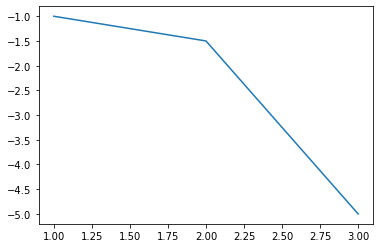

In [79]:
plt.plot(A[:, 0], A[:, 1])

In [80]:
np.corrcoef(A[:, 0], A[:, 1])

array([[ 1.        , -0.91766294],
       [-0.91766294,  1.        ]])

&emsp;&emsp;总体来说，相关系数绝对值越大两个变量的相关性越强，绝对值为1时候代表完全相关，两个变量完全线性同步变化，其中一个变量可以由另一个变量线性表出。而绝对值为0时，则表示完全线性无关，两个变量没有线性同步变化规律，这两个变量没有线性关系。当绝对值介于0和1之间时候，相关性强弱可以表示如下：

|\|Cor\||相关性|      
|:--:|:--:|   
|0~0.09|没有相关性|      
|0.1~0.3|弱相关|
|0.3~0.5|中等相关|
|0.5~1.0|强相关|

&emsp;&emsp;如果是双变量的相关性，我们也可以用一组函数关系及图像来进行表示

In [84]:
np.random.randn(20)

array([-1.64976142, -0.87343737,  0.07530987, -1.42079571, -0.83262953,
        1.21936676, -0.75871775,  0.44775161,  0.46307329,  1.44154581,
        0.79686385, -1.50887509, -0.53100092,  2.41405101, -0.28564285,
       -1.51317621, -0.90461468, -0.45806723,  1.0310925 , -0.58551109])

In [42]:
X = np.random.randn(20)
y = X + 1

很明显，此时X和y完全正相关

In [43]:
np.corrcoef(X, y)

array([[1., 1.],
       [1., 1.]])

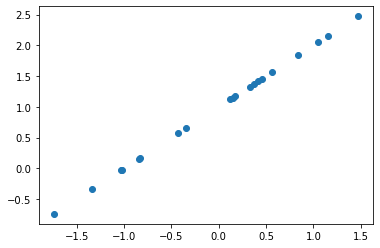

In [24]:
# 对应点图
plt.plot(X, y, 'o')

当然，如果我们想在y基础上创建一个稍微弱化线性相关关系的数组，可以在y基础上加入一个随机数作为扰动项。例如：

In [25]:
a = y.shape
a

(20,)

In [85]:
np.random.normal?

Docstring:
normal(loc=0.0, scale=1.0, size=None)

Draw random samples from a normal (Gaussian) distribution.

The probability density function of the normal distribution, first
derived by De Moivre and 200 years later by both Gauss and Laplace
independently [2]_, is often called the bell curve because of
its characteristic shape (see the example below).

The normal distributions occurs often in nature.  For example, it
describes the commonly occurring distribution of samples influenced
by a large number of tiny, random disturbances, each with its own
unique distribution [2]_.

.. note::
    New code should use the ``normal`` method of a ``default_rng()``
    instance instead; please see the :ref:`random-quick-start`.

Parameters
----------
loc : float or array_like of floats
    Mean ("centre") of the distribution.
scale : float or array_like of floats
    Standard deviation (spread or "width") of the distribution. Must be
    non-negative.
size : int or tuple of ints, optional
    Out

In [26]:
# 创建一个和y一样形状的服从标准正态分布的随机数组
np.random.normal(size=a)

array([ 0.49622906,  1.3573347 , -0.20178063,  0.87805077, -1.42474422,
       -1.70856044, -1.0952294 , -0.58293826,  1.09455328, -0.68583135,
       -0.64713056,  0.26123903, -0.47562764,  1.39130696,  0.6881981 ,
        0.30883974, -0.19414512,  1.6188312 , -2.05761665,  0.14654045])

In [89]:
np.random.normal?

Docstring:
normal(loc=0.0, scale=1.0, size=None)

Draw random samples from a normal (Gaussian) distribution.

The probability density function of the normal distribution, first
derived by De Moivre and 200 years later by both Gauss and Laplace
independently [2]_, is often called the bell curve because of
its characteristic shape (see the example below).

The normal distributions occurs often in nature.  For example, it
describes the commonly occurring distribution of samples influenced
by a large number of tiny, random disturbances, each with its own
unique distribution [2]_.

.. note::
    New code should use the ``normal`` method of a ``default_rng()``
    instance instead; please see the :ref:`random-quick-start`.

Parameters
----------
loc : float or array_like of floats
    Mean ("centre") of the distribution.
scale : float or array_like of floats
    Standard deviation (spread or "width") of the distribution. Must be
    non-negative.
size : int or tuple of ints, optional
    Out

In [86]:
ran = np.random.normal(size = X.shape)
ran

array([ 0.26042618, -1.04154116, -0.08313493, -0.79742972, -0.13280839,
        1.27921862,  0.48826155, -0.60279756,  0.60330237, -0.71903143,
        0.2286587 ,  1.9293763 ,  2.45620622,  0.78343275, -0.37187501,
        0.91938857,  1.79980253, -0.45157682, -0.37647247,  1.03357355])

接下来，创建一个控制扰动项大小的变量delta

In [87]:
delta = 0.5

因此，扰动项最终计算过程为：

In [88]:
r = ran * delta
r

array([ 0.13021309, -0.52077058, -0.04156746, -0.39871486, -0.0664042 ,
        0.63960931,  0.24413077, -0.30139878,  0.30165118, -0.35951571,
        0.11432935,  0.96468815,  1.22810311,  0.39171637, -0.18593751,
        0.45969429,  0.89990127, -0.22578841, -0.18823623,  0.51678678])

In [30]:
y1 = y + r
y1

array([ 0.16849765,  1.33677569,  2.94351355,  1.068285  ,  1.27528793,
        0.41509024, -1.33128073,  1.71470201,  0.40760464,  0.84310426,
        1.86461507, -0.33425138,  1.99110458,  1.67303745,  0.06872278,
        0.07684552,  0.20245359,  0.7843353 ,  1.5186445 ,  2.23064098])

此处，y1就是在y基础上加入扰动项之后的标签。由于有一个随性扰动项的存在，会使得y1和X的线性关系被削弱。

> 从更根本的角度来说，加入扰动项削弱线性相关性，也是因为扰动项本身无规律可循，加入数据之后只会掩盖原始规律。类似扰动项我们也可称其为白噪声。白噪声其实也有一定的实际背景，在很多情况下，我们采集的数据本身就是包含一定随机误差的，或者说是包含了无法帮助提取有效规律的信息。

<AxesSubplot:>

Text(0.5, 1.0, 'y=x+1')

<AxesSubplot:>

Text(0.5, 1.0, 'y=x+1+r')

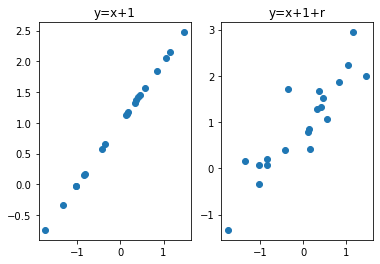

In [31]:
plt.subplot(121)
plt.plot(X, y, 'o')
plt.title('y=x+1')
plt.subplot(122)
plt.plot(X, y1, 'o')
plt.title('y=x+1+r')

由此可见，在加入了扰动项之后，模型线性相关性明显变弱。据此，当然，伴随delta的增加，噪声数据的绝对值会越来越大，掩盖原始数据线性相关规律的趋势会更加明显。我们可以简单用一组图像来展示不同相关性时双变量呈现的分布情况：

In [44]:
# delta系数取值数组
dl = [0.5, 0.7, 1, 1.5, 2, 5]

In [45]:
# 空列表容器
yl = []          # 不同delta下y的取值所组成的列表
cl = []          # 不同y下相关系数矩阵所组成的列表

In [46]:
# 计算不同delta下y和相关系数计算情况
for i in dl:
    yn = X + 1 + (ran * i)
    cl.append(np.corrcoef(X, yn))
    yl.append(yn)

In [47]:
cl

[array([[1.       , 0.9367437],
        [0.9367437, 1.       ]]),
 array([[1.       , 0.8911804],
        [0.8911804, 1.       ]]),
 array([[1.        , 0.81961547],
        [0.81961547, 1.        ]]),
 array([[1.        , 0.71248276],
        [0.71248276, 1.        ]]),
 array([[1.        , 0.62837293],
        [0.62837293, 1.        ]]),
 array([[1.        , 0.39817207],
        [0.39817207, 1.        ]])]

In [90]:
yl

[array([ 1.627525  , -0.88382241,  1.86933795, -0.02300046,  0.73433085,
        -0.33109922,  1.33691722,  2.86218277,  0.41444553,  1.9081874 ,
        -1.15456573, -1.10209687,  0.22127724,  1.08855797,  2.65327611,
         0.72665134,  1.91516867,  0.14535214, -0.00467952,  2.90418153]),
 array([ 1.83074703, -0.91569175,  2.18530488, -0.21976011,  0.71340074,
        -0.63292082,  1.10134436,  3.28833318,  0.34776874,  1.78608826,
        -1.14334884, -1.22150795,  0.02903983,  1.2104614 ,  2.61838561,
         0.76623911,  1.93033199,  0.01149336,  0.01992074,  2.97614544]),
 array([ 2.13558008, -0.96349575,  2.65925528, -0.5148996 ,  0.68200557,
        -1.08565322,  0.74798509,  3.92755879,  0.24775356,  1.60293956,
        -1.12652351, -1.40062457, -0.25931629,  1.39331655,  2.56604986,
         0.82562076,  1.95307696, -0.18929479,  0.05682113,  3.0840913 ]),
 array([ 2.64363515, -1.04316909,  3.4491726 , -1.00679874,  0.62968028,
        -1.84020721,  0.15905296,  4.99293481

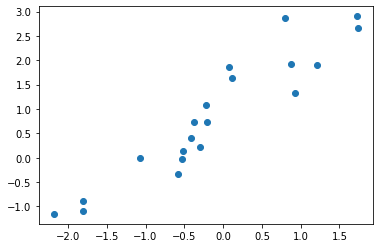

In [48]:
plt.plot(X, yl[0], 'o')

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

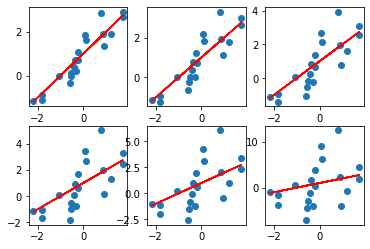

In [53]:
plt.subplot(231)
plt.plot(X, yl[0], 'o')
plt.plot(X, y, 'r-')
plt.subplot(232)
plt.plot(X, yl[1], 'o')
plt.plot(X, y, 'r-')
plt.subplot(233)
plt.plot(X, yl[2], 'o')
plt.plot(X, y, 'r-')
plt.subplot(234)
plt.plot(X, yl[3], 'o')
plt.plot(X, y, 'r-')
plt.subplot(235)
plt.plot(X, yl[4], 'o')
plt.plot(X, y, 'r-')
plt.subplot(236)
plt.plot(X, yl[5], 'o')
plt.plot(X, y, 'r-')

能够明显看出，伴随delta取值越来越大，数据相关性越来越弱，当然，我们也能通过观察cl的取值来查看各组变量的相关系数

In [54]:
cl

[array([[1.       , 0.9367437],
        [0.9367437, 1.       ]]),
 array([[1.       , 0.8911804],
        [0.8911804, 1.       ]]),
 array([[1.        , 0.81961547],
        [0.81961547, 1.        ]]),
 array([[1.        , 0.71248276],
        [0.71248276, 1.        ]]),
 array([[1.        , 0.62837293],
        [0.62837293, 1.        ]]),
 array([[1.        , 0.39817207],
        [0.39817207, 1.        ]])]

- 捕捉规律与创建规律

&emsp;&emsp;根据Lesson 2补充材料所介绍，简单线性回归就是在二维平面中通过构建一条直线来试图捕捉平面当中的点，线性相关性越弱、线性模型越难捕捉到这些所有点，模型效果就越差。换而言之，就是数据集之间线性相关性越明显，数据规律越明显，模型越容易捕捉到这些规律。

&emsp;&emsp;在这个基础理论之上，我们有以下两方面衍生的应用：

&emsp;&emsp;其一：我们可以在构建线性模型之前先探查数据本身的线性相关性，如果自变量和因变量存在很好的相关性，那就一定可以顺利的构建线性回归模型对数据进行拟合。而如果线性相关性不强，则说明当前数据并不适合构建线性回归模型，或者在构建模型之前我们需要对数据进行一些“不影响真实规律”的转化，令其表现出线性的分布趋势。当然，如果需要更换模型，就需要在我们学习了更多其他模型之后来进行讨论，而如果是围绕数据进行修改，则会涉及特征工程相关理论；      
&emsp;&emsp;其二：上述几组不同的数据，实际上就代表着对线性回归模型建模难度各不相同的几组数据，delta越大对线性回归模型来说建模就更加困难。据此，我们可以生成一个手动创建数据集的函数，该函数可以输出不同建模难度（规律深浅）的数据集，来辅助我们测试模型和优化算法的性能。

> 当然，线性相关性的减弱，不仅是对于线性回归模型，对于很多回归类问题都会造成更大的建模困难。